# Optical Character Recognition

![OCR_Cover](OCR_Banner.jpg)

## Table of Contents
1. [Introduction](#introduction)
2. [The OCR Challenge](#the-ocr-challenge)
3. [The Target Image](#the-target-image)
4. [Challenger #1: Easy OCR](#challenger-1-easyocr)
    1. [Extracting text with EasyOCR](#extracting-text-with-easyocr)
    2. [Conclusion - EasyOCR](#conclusion---easyocr)
5. [Challenger #2: Tesseract](#challenger-2-tesseract)
    1. [Advice installing Tesseract](#advice-installing-tesseract)
    2. [Extracting text with Pytesseract](#extracting-text-with-pytesseract)
    3. [Conclusion - Pytesseract](#conclusion---pytesseract)
6. [Challenger #3: Keras-OCR](#challenger-3-keras-ocr)
    1. [Extracting text with Keras-OCR](#extracting-text-with-keras-ocr)
    2. [Conclusion - Keras-OCR](#conclusion---keras-ocr)



## Introduction

Optical character recognition (OCR) is a technology that can convert scanned images of text into editable and searchable data. It relies on computer vision and natural language processing techniques to detect, segment, classify, and correct the characters in an image. However, OCR is not a perfect solution and it still has some limitations and challenges, which include:

- OCR may not work well with low-quality images, handwritten or cursive text, and containing different languages and fonts.
- OCR only outputs unstructured characters, which means that it does not understand the meaning or context of the text. OCR needs to be combined with other machine learning technologies to extract structured data from documents, such as names, dates, addresses, etc.
- OCR may have difficulty handling specific types of documents, such as invoices, contracts, receipts, etc. Because OCR does not know the format or layout of the document, and it may miss or misinterpret important information.
- OCR may also have trouble with colored backgrounds, blurry or glared texts, skewed or non-oriented documents, etc.
- OCR may make errors or omissions that can have serious consequences for consumers, businesses, or regulators. Because of this, OCR may not be accurate enough for some applications, such as medical device compliance, identity verification, or legal document processing. 

Overall OCR solutions may also have different accuracy levels for different use cases and scenarios, and good perfromers in some cases can be out performed in other situations. 

## The OCR Challenge

This challenge will put face to face 3 popular contenders for the best OCR technology out there:
> - EasyOCR,
> - Tesseract
> - Keras OCR

In this first part of the challenge, we will simply try to get to know the challengers, how they output their results, how easy is to access them, so that we can already start devloping an idea to which type of situation each OCR technology would be more suitable.

In the second part of the challenge we will test their ability to detect characters, words and sentences under different scenarios.

## The Target Image
In this section, we will be reading this file, which contains a logo image with some letters, a title, 2 paragraphs, and overall 26 lines written in the english language.
It is a sample page from an historical account of a small Irish community: the Duagh GAA club and its parish, and how that community managed to get their football playing fields - you can learn more about them [here](http://duaghgaa.ie/pages/parishdistricthistory.aspx).

![text_file](.\data\scan_p1.jpeg)

Some key points about the sample file:

> - The image is large, and noise levels are fairly low.
> - Despite a the wrinkle crossing the paper, and some other non-character features, the text appears clear.
> - The logo contains also letter and numbers which can cause some problem.

Overall the image can present some problems but is not super complicated.

## Challenger #1: EasyOCR

The EasyOCR library for python is an AI-driven OCR solution developed by [JAIDED AI](https://www.jaided.ai/easyocr/) which is a company focused on applying OCR-technology to documents. Unlike many other contenders that can be difficult to use, EasyOCR does what it says in the tin. For more info you can check the [Python Package Index (aka PyPI)](https://pypi.org/project/easyocr/) or their [github repository](https://github.com/JaidedAI/EasyOCR).

### Extracting text with EasyOCR

In [4]:
# prepare the easyOCR engine to use english
import easyocr
reader = easyocr.Reader(["en"])

# Note: easyocr supports over 80 languages, check the docs for more info.

Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


In [5]:
# extract text from image
result_easyOCR = reader.readtext(".\Data\scan_p1.jpeg")

#checkout details of the output
print(type(result_easyOCR)) # we get a list object
print(len(result_easyOCR))  # the list has 35 elements (does not match the number of:
                            # - written lines(26) and
                            # - empty lines (2)

<class 'list'>
35


In [6]:
# Let's look at the first 5 elements of result object
[print(result_easyOCR[x]) for x in range(5)];

# Note that result is a list of tuples comprised of: a) a list of lists, b) a string and c) a float.
# a) The list of lists are the coordinates of the box where characters were identified
# 2) The string is the set of characters that were identified
# 3) The float is the model confidence level

([[532, 264], [1008, 264], [1008, 312], [532, 312]], 'Duagh GAA Pitch Development', 0.9366231208709843)
([[502, 344], [1010, 344], [1010, 392], [502, 392]], "In 1968, Father 0' Sullivan was", 0.6078638088529659)
([[499, 394], [962, 394], [962, 446], [499, 446]], 'negotiating a central school', 0.9964042158365737)
([[504, 442], [900, 442], [900, 492], [504, 492]], 'with the Department of', 0.7829030071102813)
([[503, 495], [677, 495], [677, 537], [503, 537]], 'Education:', 0.8774349752030293)


In [7]:
# let's print out strings identified
[print(result_easyOCR[x][1]) for x in range(len(result_easyOCR))];

# Note: Clearly each string is not necessarily a line of the text
# Also, the final 4 detections seem strange.

Duagh GAA Pitch Development
In 1968, Father 0' Sullivan was
negotiating a central school
with the Department of
Education:
Up until then, there
were five individual schools in
the Duagh side of the
The Department stipulated
extra playing space was
required to cater for the larger
number of children.
Father 0' Sullivan invited the GAA to the presbytery and
informed them of his plans for a new central school:
Present at this meeting were Billy Doran (Chairman),
Jimmy Buckley (Secretary), Billy 0' Connell and Tony
Maher (Treasurers), Mickey Joe Daly and Ger Murphy:
He
briefed them of the Department's stipulation for extra
playing space and that he could buy land at the back of the
proposed school from Mrs Murphy (Ma Kate) at a
reasonable price for a football pitch and to facilitate the
school children:
At this time, the GAA in Duagh did not
have a playing field, and matches were played in various
fields around the
The land would be handed over
to the GAA to pay for it and to develop it:
I

In [8]:
# import OpenCV to manipulate images
import cv2
# import matplolib.pyplot to display images in jupyter notebooks
from matplotlib import pyplot as plt

# Convert image into an np.array
img = cv2.imread(".\data\scan_p1.jpeg")

# function to display a selected detection from the EasyOCR output
def show_easyocr_box(image,ocr_result:list,detection_nr:int):
    ''' shows bounding box for a detected string listed in the easyOCR output result'''

    if detection_nr >= len(ocr_result):
        print("Detection number exceedes the number of detections, i.e. {}.".format(len(ocr_result)))
        print("Please try again!")
        return
    else:
        print(ocr_result[detection_nr][1])
        x1,y1 = ocr_result[detection_nr][0][0]
        x2,y2 = ocr_result[detection_nr][0][2]
        output_img = image.copy()
        cv2.rectangle(output_img,(int(x1), int(y1)),(int(x2), int(y2)),(255,0,0),3)
        plt.figure(figsize = (10,10))
        plt.imshow(output_img)
        plt.show()

to the GAA to pay for it and to develop it:


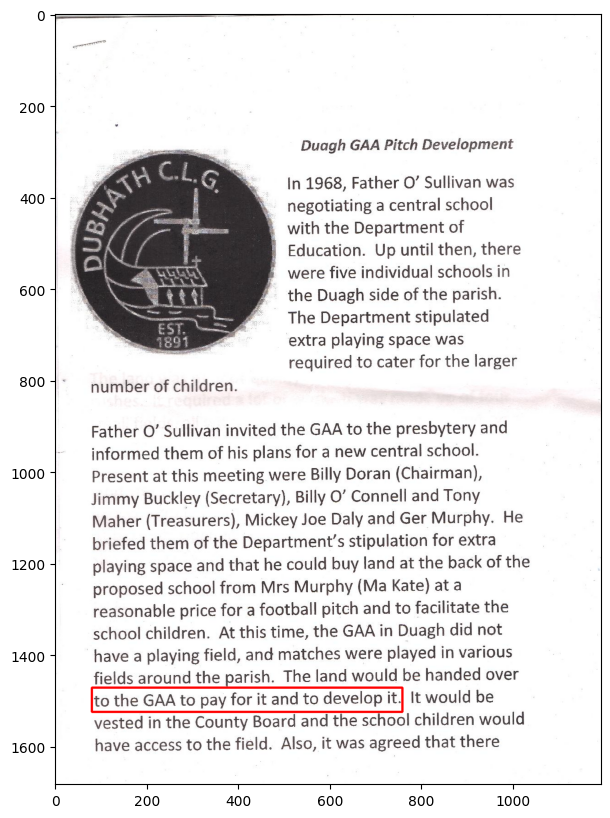

In [9]:
# Confirm detections agains the image
show_easyocr_box(img,result_easyOCR,27)

# Note:
#   It seems that easyOCR sometimes detects a colon (:) instead of a period (.)
#       Check out entries #16, #22, #27, #30
#   Also to note is that on occasion, instead of detecting a single line, it seems to stop
#   

In [10]:
# It is possible to obtain the result object which is easier to read
result_easyOCR1 = reader.readtext(".\data\scan_p1.jpeg", detail = 0, paragraph = True)
result_easyOCR1

# Note: The model identified 5 paragraphs, with the last one ("CLG 0") being 
# something easyOCR identified in the logo region of the image. 

['Duagh GAA Pitch Development',
 "In 1968, Father 0' Sullivan was negotiating a central school with the Department of Education: Up until then, there were five individual schools in the Duagh side of the parish. The Department stipulated extra playing space was required to cater for the larger",
 'number of children.',
 "Father 0' Sullivan invited the GAA to the presbytery and informed them of his plans for a new central school: Present at this meeting were Billy Doran (Chairman), Jimmy Buckley (Secretary), Billy 0' Connell and Tony Maher (Treasurers), Mickey Joe Daly and Ger Murphy: He briefed them of the Department's stipulation for extra playing space and that he could buy land at the back of the proposed school from Mrs Murphy (Ma Kate) at a reasonable price for a football pitch and to facilitate the school children: At this time, the GAA in Duagh did not have a playing field, and matches were played in various fields around the parish. The land would be handed over to the GAA to p

In [11]:
# Write a function to wrap the output of easyOCR as a list of paragraphs
import re
def wrap_text(result:list, wrap_size=100):
    ''' Takes a list of strings (easyOCR output) and prints out each element in a wrapped layout
    as defined by the user in the wrap_size variable.
    '''
    # regular expression that helps to wrap the text
    regex = r".{," + rf"{wrap_size}" + r"}(?:\s|$)"

    for paragraph in result:
        if len(paragraph) <= wrap_size:
            print(paragraph)
        else:
            regex_match = re.findall(regex,paragraph)
            for string in regex_match:
                print(string)

In [12]:
wrap_text(result_easyOCR1)

Duagh GAA Pitch Development
In 1968, Father 0' Sullivan was negotiating a central school with the Department of Education: Up 
until then, there were five individual schools in the Duagh side of the parish. The Department 
stipulated extra playing space was required to cater for the larger

number of children.
Father 0' Sullivan invited the GAA to the presbytery and informed them of his plans for a new 
central school: Present at this meeting were Billy Doran (Chairman), Jimmy Buckley (Secretary), 
Billy 0' Connell and Tony Maher (Treasurers), Mickey Joe Daly and Ger Murphy: He briefed them of the 
Department's stipulation for extra playing space and that he could buy land at the back of the 
proposed school from Mrs Murphy (Ma Kate) at a reasonable price for a football pitch and to 
facilitate the school children: At this time, the GAA in Duagh did not have a playing field, and 
matches were played in various fields around the parish. The land would be handed over to the GAA to 
pay f

### Conclusion - EasyOCR

> - Very user friendly.
> - Detects entires sequences of characters, insted of individual characters
> - Flexible output can provide detected results organized as paragraphs
> - Somehow managed to mistake periods for semicolons
> - Detected some letter requences in the logo, but not all.
> - Characters in the logo got their own paragraph, and were not mixed among other detections.
> - Does not provide functions to visualize detections atop target image.

## Challenger #2: Tesseract

Tessaract was originally developed by Hewlett-Packard in the 1980s, and then released as open source in 2005. Since 2006, Google has sponsored its development and added many features and languages.

For python there are different ways to access the Tessaract-OCR engine, either by using the [pytessaract](https://pypi.org/project/pytesseract/) project or the [tesserocr](https://pypi.org/project/tesserocr/) project.
    
The main difference between the tesserocr and pytesseract is that:
- tesserocr is a python wrapper around the Tesseract C++ API, while 
- pytesseract is a wrapper around the tesseract-ocr command-line interface.

This means that tesserocr can directly access the Tesseract library functions and data structures, while pytesseract has to invoke the tesseract-ocr executable and parse its output.

Some advantages of using tesserocr over pytesseract are:

- Tesserocr is faster and more efficient, as it does not have to create temporary files or subprocesses for each image. It can also preload the model at the beginning of the program and reuse it for multiple images.
- Tesserocr has more options and flexibility, as it can access all the parameters and methods of the Tesseract API. It can also handle different image formats, such as PIL, numpy, or raw bytes.
- Tesserocr supports multithreading, which can improve the performance and scalability of the OCR process.

Some disadvantages of using tesserocr over pytesseract are:

- Tesserocr is harder to install and configure, as it requires compiling the Tesseract library and its dependencies. It may also have compatibility issues with different versions of Tesseract or Python.
- Tesserocr has less documentation and support, as it is a relatively new and less popular project. It may also have some bugs or missing features that are not yet implemented or fixed.

For more info, check out these articles:
- (1) [Stack Overflow: What is the difference between Pytesseract and Tesserocr?](https://stackoverflow.com/questions/54761638/what-is-the-difference-between-pytesseract-and-tesserocr)
- (2) [Stack Overflow: Tesserocr vs Pytesseract Speed comparison](https://stackoverflow.com/questions/74011773/tesserocr-vs-pytesseract-speed-comparison)
- (3) [LibHunt: pytesseract vs tesserocr - compare differences and reviews?](https://www.libhunt.com/compare-pytesseract-vs-tesserocr)
- (4) [Python in Plain English: Tesserocr vs. Pytesseract](https://python.plainenglish.io/tesserocr-vs-pytesseract-d6720207bb54)

### Advice installing Tesseract
To help installing Tesseract on your local machine, I put down a couple of links that might be useful:

Linux, MacOS and Windows:
- https://github.com/tesseract-ocr/tessdoc/blob/main/Installation.md
- https://nanonets.com/blog/ocr-with-tesseract/

Linux and MacOS:
- https://pyimagesearch.com/2021/08/16/installing-tesseract-pytesseract-and-python-ocr-packages-on-your-system/

Windows:
- https://github.com/UB-Mannheim/tesseract/wiki

### Extracting text with Pytesseract

In [13]:
# Get Pytesseract for OCR detection
import pytesseract

# I will continue to use OpenCV, but
# you can use PIL with tesseract
# from PIL import Image

# Pass to the tesseract wrapper the location of the executable
pytesseract.pytesseract.tesseract_cmd = 'C:\\Program Files\\Tesseract-OCR\\tesseract.exe'

# List of available languages
pytesseract.get_languages(config='')

['eng', 'osd']

In [14]:
# Open the image using the PIL library
# img = Image.open('.\data\scan_p1.jpeg')

# Using OpenCV be beware of its BGR convention.
# Because pytesseract assumes RGB format, an image opened with OpenCV
# needs to be converted from BGR to RGB format before being processed.
import cv2
img_cv = cv2.imread('.\data\scan_p1.jpeg')
img = cv2.cvtColor(img_cv, cv2.COLOR_BGR2RGB)

# Process the image to extract text
result_tess = pytesseract.image_to_string(img)

# Check the datatype of the output
type(result_tess)
# Note: unlike easyOCR, the output of pytesseract is a single string.

str

In [15]:
# Let's look at the output string
print(result_tess)

# Note: it appears that tessaract detects the lines and especially in the first paragraph 


Duagh GAA Pitch Development

. In 1968, Father 0’ Sullivan was
i. negotiating a central school
| with the Department of
} Education. Up until then, there
F were five individual schools in

- the Duagh side of the parish.
~The Department stipulated
extra playing space was
required to cater for the larger

number of children.

Father O’ Sullivan invited the GAA to the presbytery and
informed them of his plans for a new central school.
Present at this meeting were Billy Doran (Chairman),
Jimmy Buckley (Secretary), Billy O’ Connell and Tony
Maher (Treasurers), Mickey Joe Daly and Ger Murphy. He
briefed them of the Department’s stipulation for extra
playing space and that he could buy land at the back of the
proposed school from Mrs Murphy (Ma Kate) ata
reasonable price for a football pitch and to facilitate the
school children. At this time, the GAA in Duagh did not
have a playing field, and matches were played in various
fields around the parish. The land would be handed over
to the GAA t

In [16]:
# Get bounding boxes for the recognized elements
print(pytesseract.image_to_boxes(img))

#Note: while easyOCR outputs boxes for sequences of characters,
# tessaract outputs boxes for individual characters.

~ 146 1676 762 1682 0
D 538 1383 559 1406 0
u 561 1383 578 1400 0
a 580 1383 596 1401 0
g 598 1377 616 1401 0
h 617 1384 634 1409 0
G 645 1384 667 1408 0
A 666 1384 687 1408 0
A 688 1385 709 1408 0
P 719 1385 738 1408 0
i 739 1385 747 1409 0
t 748 1385 760 1406 0
c 760 1385 774 1402 0
h 775 1385 791 1410 0
D 802 1386 823 1409 0
e 825 1385 841 1403 0
v 844 1386 859 1403 0
e 859 1386 875 1403 0
l 877 1386 886 1411 0
o 886 1386 903 1404 0
p 903 1380 922 1404 0
m 923 1387 950 1404 0
e 953 1387 968 1404 0
n 964 1380 979 1411 0
t 970 1387 1001 1409 0
. 427 1296 430 1298 0
I 509 1299 513 1325 0
n 519 1299 535 1318 0
1 549 1299 564 1325 0
9 568 1299 585 1326 0
6 589 1299 606 1326 0
8 608 1300 626 1326 0
, 628 1294 635 1305 0
F 649 1300 663 1326 0
a 666 1300 680 1320 0
t 683 1300 695 1324 0
h 699 1301 715 1328 0
e 719 1300 736 1320 0
r 740 1301 751 1320 0
0 762 1301 785 1327 0
’ 788 1318 795 1329 0
S 808 1301 823 1328 0
u 820 1301 835 1329 0
l 827 1302 843 1321 0
l 848 1302 861 1329 0
i 866 130

In [17]:
# Using the image_to_data function, Pytesseract allows for a more verbose access to the recognitions it makes.
# The default output is a "string" but it is best visualized as a table, here shown as a Pandas dataframe.
import pandas as pd

# Extract data from image to a DataFrame
# (other available output_type: "string", "dict" and "bytes")
df_tess_result = pytesseract.image_to_data(img, output_type="data.frame")
df_tess_result.head(20)

# Note: unlike the image_to_boxes function, image_to_data provides whole words.
# However, note how some of the recognitions are either NaN or None

level  page_num  block_num  par_num  line_num  word_num  left  top  width   
0       1         1          0        0         0         0     0    0   1192  \
1       2         1          1        0         0         0   146    0    616   
2       3         1          1        1         0         0   146    0    616   
3       4         1          1        1         1         0   146    0    616   
4       5         1          1        1         1         1   146    0    616   
5       2         1          2        0         0         0   538  271    463   
6       3         1          2        1         0         0   538  271    463   
7       4         1          2        1         1         0   538  271    463   
8       5         1          2        1         1         1   538  273     96   
9       5         1          2        1         1         2   645  274     64   
10      5         1          2        1         1         3   719  272     72   
11      5         1          2        1         1         4   802  271    199   
12      2         1          3        0         0         0   427  353    589   
13      3         1          3        1         0         0   427  353    589   
14      4         1          3        1         1         0   427  353    575   
15      5         1          3        1         1         1   427  384      3   
16      5         1          3        1         1         2   509  357     26   
17      5         1          3        1         1         3   549  356     86   
18      5         1          3        1         1         4   649  354    102   
19      5         1          3        1         1         5   762  353     33   

    height       conf         text  
0     1682  -1.000000          NaN  
1        6  -1.000000          NaN  
2        6  -1.000000          NaN  
3        6  -1.000000          NaN  
4        6  95.000000               
5       34  -1.000000          NaN  
6       34  -1.000000          NaN  
7       34  -1.000000          NaN  
8       32  92.733330        Duagh  
9       24  96.208153          GAA  
10      25  96.191299        Pitch  
11      31  96.572945  Development  
12     428  -1.000000          NaN  
13     230  -1.000000          NaN  
14      35  -1.000000          NaN  
15       2  13.067032            .  
16      26  92.311821           In  
17      32  96.176262        1968,  
18      28  96.724907       Father  
19      28  62.503315           0’

In [18]:
# function to display a selected detection from the pytesseract.image_to_data dataframe output
def show_tess_box(image,tess_result:pd.DataFrame,detection_nr:int):
    ''' shows bounding box for a detected string listed in the pytesseract.image_to_data
    dataframe result'''

    if detection_nr >= len(tess_result):
        print("Detection number exceedes the number of detections, i.e. {}.".format(len(ocr_result)))
        print("Please try again!")
        return
    else:
        # print detection
        print(tess_result.loc[detection_nr,"text"])
        # get box coordinates
        x1 = int(tess_result.loc[detection_nr,"left"])
        y1 = int(tess_result.loc[detection_nr,"top"])
        x2 = int(x1 + tess_result.loc[detection_nr,"width"])
        y2 = int(y1 + tess_result.loc[detection_nr,"height"])
        # draw box on image and display
        output_img = image.copy()
        cv2.rectangle(output_img,(x1, y1),(x2, y2),(255,0,0),3)
        plt.figure(figsize = (10,10))
        plt.imshow(output_img)
        plt.show()

nan


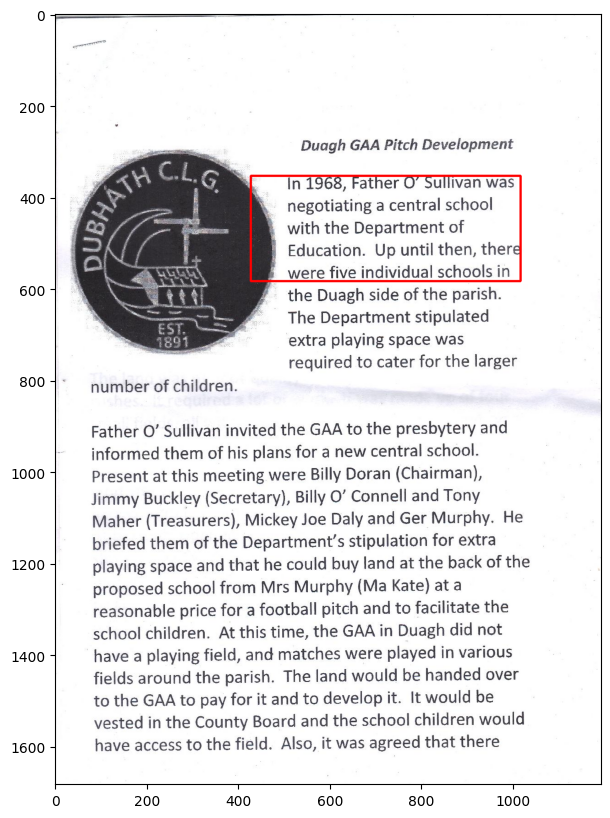

In [19]:
show_tess_box(img,df_tess_result,13)

# Note: Some of the recognitions are not of single words or letters,
# but portions of the text, or other page markings without text.

### Conclusion - Pytesseract
> - A bit more difficult to install than EasyOCR
> - Outputs detections by observing the layout, line by line.
> - Enables access to output at the level of the character and of the word
> - Several non-alphanumeric characters were identified where there were none (false positives)
> - False positives were interspersed in the main text
> - Characters in the logo were not identified
> - Does not provide functions to visualize the output atop the target image

In [20]:
for row in range(len(df_tess_result)):
    print(df_tess_result.loc[row,"text"])

nan
nan
nan
nan
 
nan
nan
nan
Duagh
GAA
Pitch
Development
nan
nan
nan
.
In
1968,
Father
0’
Sullivan
was
nan
i.
negotiating
a
central
school
nan
|
with
the
Department
of
nan
}
Education.
Up
until
then,
there
nan
F
were
five
individual
schools
in
nan
nan
-
the
Duagh
side
of
the
parish.
nan
~The
Department
stipulated
nan
extra
playing
space
was
nan
required
to
cater
for
the
larger
nan
nan
nan
 
nan
nan
nan
number
of
children.
nan
nan
nan
Father
O’
Sullivan
invited
the
GAA
to
the
presbytery
and
nan
informed
them
of
his
plans
for
a
new
central
school.
nan
Present
at
this
meeting
were
Billy
Doran
(Chairman),
nan
Jimmy
Buckley
(Secretary),
Billy
O’
Connell
and
Tony
nan
Maher
(Treasurers),
Mickey
Joe
Daly
and
Ger
Murphy.
He
nan
briefed
them
of
the
Department’s
stipulation
for
extra
nan
playing
space
and
that
he
could
buy
land
at
the
back
of
the
nan
proposed
school
from
Mrs
Murphy
(Ma
Kate)
ata
nan
reasonable
price
for
a
football
pitch
and
to
facilitate
the
nan
school
children.
At
this
time,
th

## Challenger #3: Keras-OCR

Keras-OCR is a Python package that provides a high-level API for training a text detection and OCR pipeline.

It uses two main components: a text detector and an OCR recognizer:

- The detector is responsible for detecting areas in the image that contain text. Keras-OCR uses the CRAFT text detection model for this purpose.
- The recognizer is responsible for recognizing the characters in the detected text areas. Keras-OCR uses a CRNN (Convolutional Recurrent Neural Network) implementation for this purpose.

Together, these two components allow Keras-OCR to detect and recognize text in images.

The keras-OCR library provides you can interface with five different groups of functions:
- Detection:  enables tweeking of parameters for text detection 
- Recognition: allows fine-tuning of recognition parameters
- Data Generation: synthethic data generator
- Tools: enables manipulation of inputs and outputs
- Datasets: Enables access to stored datasets
- Evaluation: in-built functions to evaluate models
- Pipeline: a combination of detection and recongition functions that enables streamlined image to text conversion

### Extracting text with Keras-OCR

In [21]:
#get library
import keras_ocr

# The pipeline module enables keras-ocr to automatically download 
# pretrained weights  for the detector and recognizer.
pipeline = keras_ocr.pipeline.Pipeline()

Looking for C:\Users\rhjpi\.keras-ocr\craft_mlt_25k.h5
Looking for C:\Users\rhjpi\.keras-ocr\crnn_kurapan.h5


<class 'numpy.ndarray'>


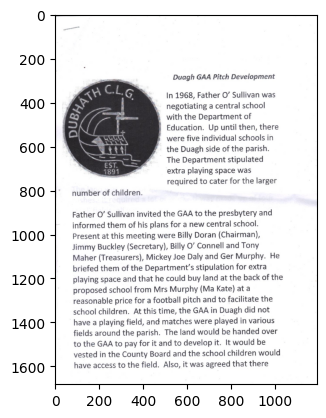

In [22]:
# Get the images
keras_img = keras_ocr.tools.read(".\data\scan_p1.jpeg")
print(type(keras_img))
plt.imshow(keras_img);

# Note: we get a np.ndarray!

In [23]:
# Get text from image
prediction_groups = pipeline.recognize(images=[keras_img])

# Get details about the prediction object
print(type(prediction_groups))
print(len(prediction_groups))

# Note: The output is a list of lists, where each sublist refers to each input image.
# The object "prediction_groups" has length 1 (i.e. it contains only 1 sublist) because
# only one image was part of the input list("images=[keras_img]"")


7/7 [==============================] - 7s 742ms/step
<class 'list'>
1


In [24]:
#Let's look at the recognitions made for the "keras_img" object
prediction_groups[0]

# Note: We see that it is a list of tuples, where each tuple has two elements:
# a) the recognized word
# b) an array with the coordinates of the bounding boxes.

[('pitch',
  array([[717.80664, 269.38278],
         [795.0078 , 269.38278],
         [795.0078 , 300.59177],
         [717.80664, 300.59177]], dtype=float32)),
 ('development',
  array([[ 800.1208 ,  268.1    ],
         [1003.94806,  271.05402],
         [1003.4286 ,  306.89752],
         [ 799.60126,  303.9435 ]], dtype=float32)),
 ('duagh',
  array([[535.48047, 271.0254 ],
         [637.3203 , 271.0254 ],
         [637.3203 , 307.1621 ],
         [535.48047, 307.1621 ]], dtype=float32)),
 ('gaa',
  array([[642.24805, 271.0254 ],
         [711.2363 , 271.0254 ],
         [711.2363 , 300.5918 ],
         [642.24805, 300.5918 ]], dtype=float32)),
 ('clig',
  array([[227.45544, 308.2416 ],
         [370.76456, 331.356  ],
         [361.31058, 389.9707 ],
         [218.00143, 366.8563 ]], dtype=float32)),
 ('oubhathy',
  array([[148.83813 , 303.45413 ],
         [224.2088  , 348.26913 ],
         [ 87.87216 , 577.56256 ],
         [ 12.501499, 532.74756 ]], dtype=float32)),
 ('o',
  arr

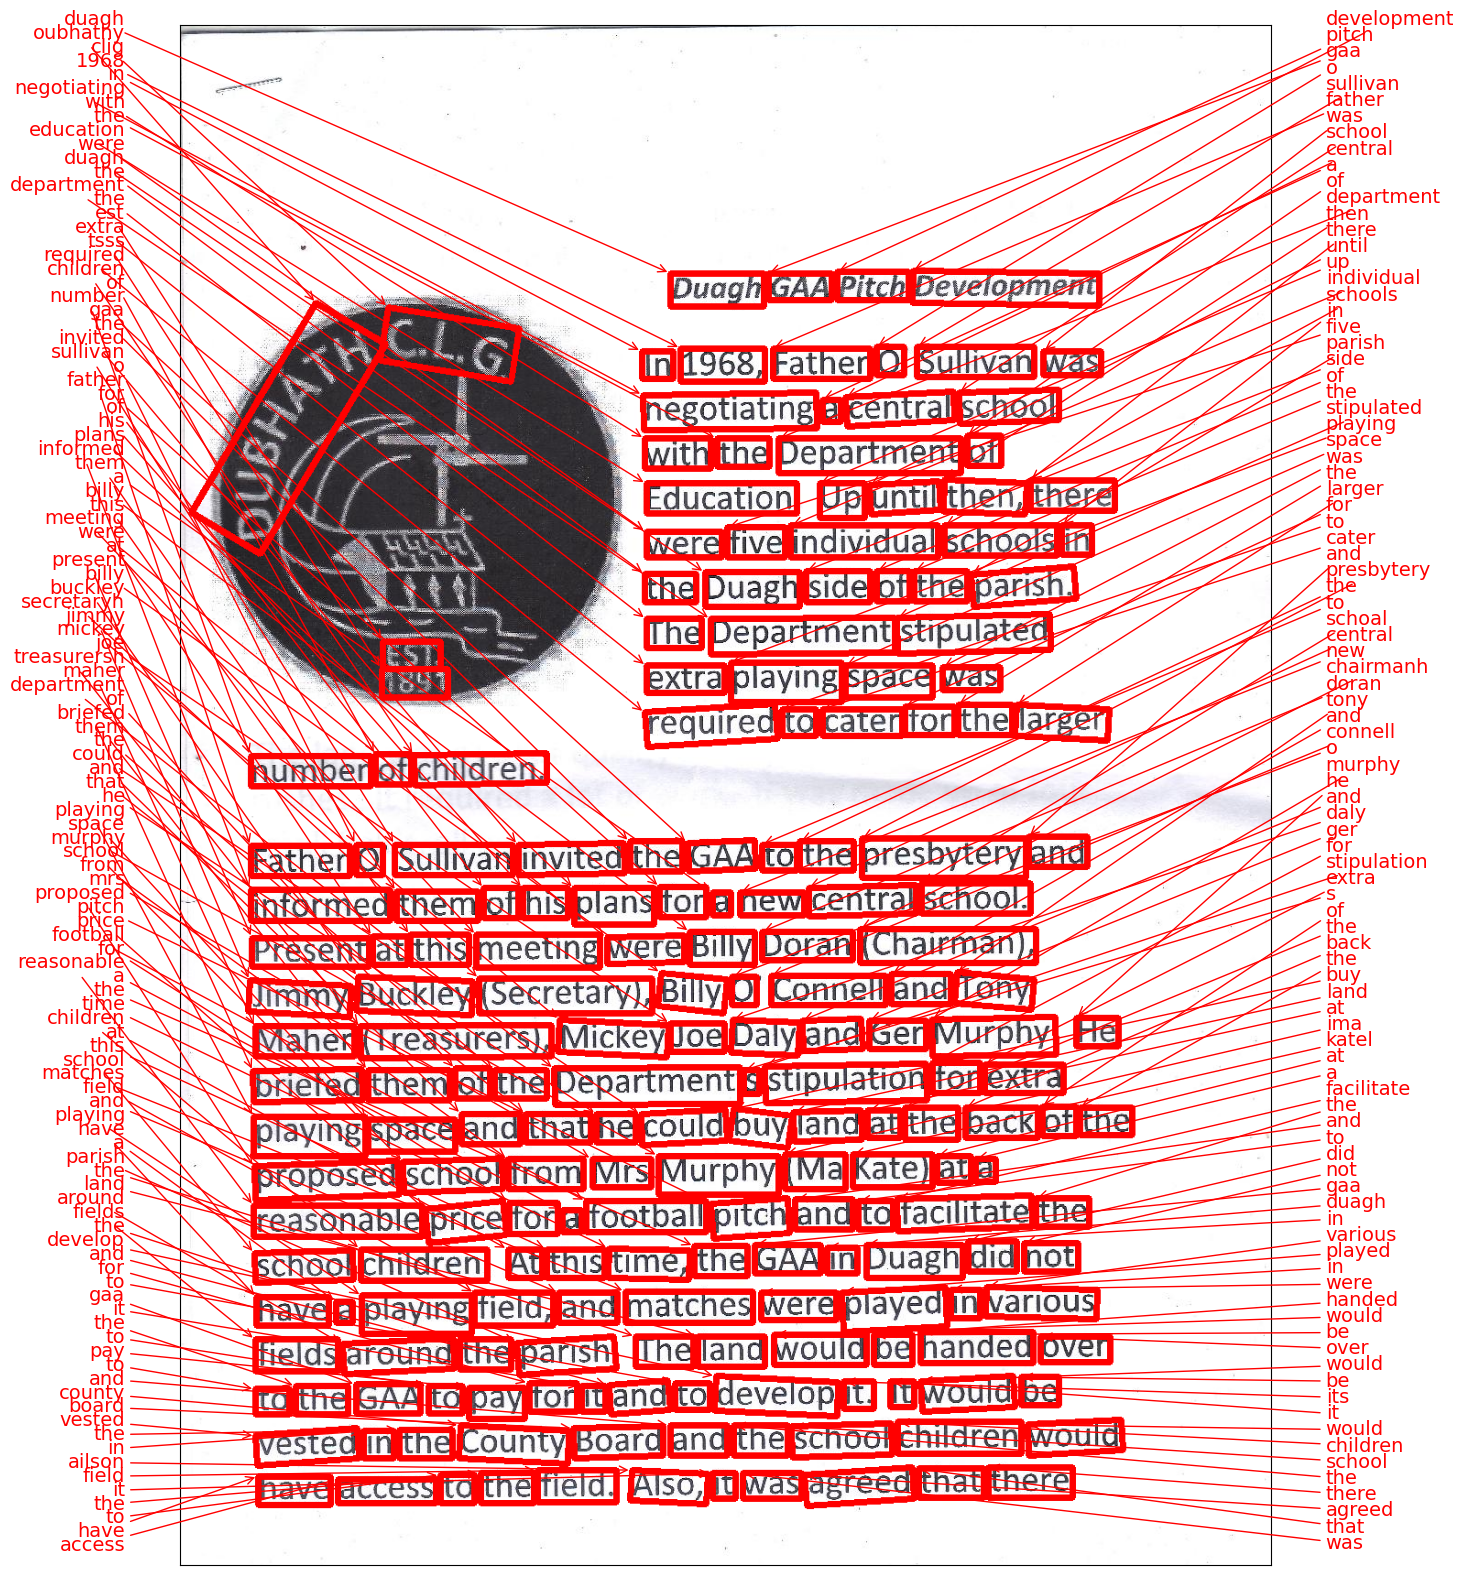

In [25]:
# Plot the recognized words
fig, axs = plt.subplots(nrows=1, figsize=(20, 20))
for ax, image, predictions in zip([axs], [keras_img], prediction_groups):
    keras_ocr.tools.drawAnnotations(image=image, predictions=predictions, ax=ax)

# Note: It appears that all alphanumeric characters were recognized, including those of the logo

In [26]:
# Keras_OCR does not really provide an out-of-the box function to get long format text.
# So we need to be a bit creative and join the words
for predictions in prediction_groups:
  result_keras = " ".join([word for word, box in predictions])
  print(result_keras)

# Note: This way we get just one long string which is difficult to read.

pitch development duagh gaa clig oubhathy o sullivan 1968 father was in school central negotiating a of with the department then there until education up individual schools in five were parish side of the duagh the stipulated department the est playing extra space was tsss the required for larger to cater of children number and presbytery the gaa the invited to o sullivan father schoal central for of his plans informed them a new chairmanh billy doran this meeting at were present and tony o connell billy secretaryh buckley jimmy murphy he and daly ger mickey joe treasurersh maher for stipulation extra department of s briefed them the of the back the could buy land at and that he playing space ima katel murphy at a school from mrs proposed facilitate the pitch and football to for reasonable price a did not gaa duagh the in children at this time school played various in matches field and were playing have a handed would be the land over parish fields around the would be develop its it an

In [27]:
# wrap the text string generated above
regex = r".{,100}(?:\s|$)"
regex_match = re.findall(regex,result_keras)

for string in regex_match:
    if string != "\n":
        print(string)
# Note that all words all in lower letter case and there are no punctuation marks.

pitch development duagh gaa clig oubhathy o sullivan 1968 father was in school central negotiating a 
of with the department then there until education up individual schools in five were parish side of 
the duagh the stipulated department the est playing extra space was tsss the required for larger to 
cater of children number and presbytery the gaa the invited to o sullivan father schoal central for 
of his plans informed them a new chairmanh billy doran this meeting at were present and tony o 
connell billy secretaryh buckley jimmy murphy he and daly ger mickey joe treasurersh maher for 
stipulation extra department of s briefed them the of the back the could buy land at and that he 
playing space ima katel murphy at a school from mrs proposed facilitate the pitch and football to 
for reasonable price a did not gaa duagh the in children at this time school played various in 
matches field and were playing have a handed would be the land over parish fields around the would 
be develop

In [28]:
# Function to display one detection at a time
def show_keras_box(image,predictions:list,detection_nr:int):

    plt.figure(figsize=(10,10))
    ax_img = plt.axes()
    if len(predictions) == 1:
        keras_ocr.tools.drawAnnotations(image=image, predictions=[predictions[0][detection_nr]], ax=ax_img)
    else:
        print("Please check code to include evaluate more than one image")
    plt.show()

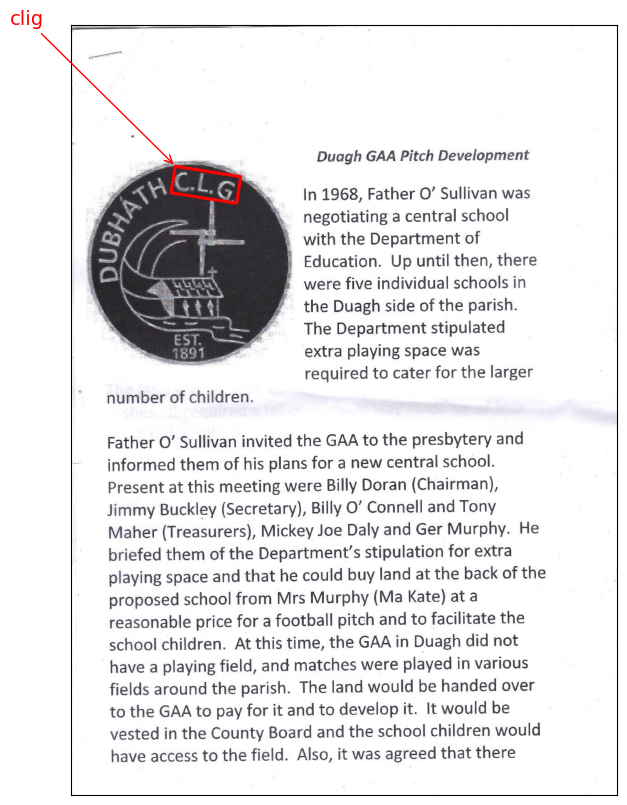

In [33]:
show_keras_box(keras_img,prediction_groups,4)

### Conclusion - Keras-OCR
> - Easy to use
> - Provides word-level detection
> - Recognized all words, incldung all letters in the logo.
> - Provides functions to visualize the output atop the target image
> - Provides the tools to train the OCR engine to multiple cases
> - Out of the box the trained model does not distinguish letter case, nor punctuation marks
> - Several non-alphanumeric characters were identified where there were none (false positives)
> - False positives were interspersed in the main text - although natively the output is not at text level
> - All sequences of characters in the logo were detected (although not correctly recognized)
